In [256]:
%matplotlib inline

In [257]:
import os.path as op
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

from IPython.display import display, HTML

In [258]:
data_directory = '/home/robert/data/ca-water-challenge'

In [259]:
ls /home/robert/data/ca-water-challenge/hr2w/

HR2W_Data_Dictionary_0_0.pdf     faqs_20180402.pdf
MCLsEPAvsDWP-2014-07-01.pdf      hr2w_web_data_active_8_2018.csv
ec_summary__august2018/          hr2w_web_data_rtc_8_2018.csv
ec_summary__august2018.geo.json


# Load water system locations

In [260]:
ec = gpd.read_file(f'{data_directory}/hr2w/ec_summary__august2018/')

# Load violations
Violations are split between two files, one containing active violations and one containing violations that were eventually resolved (return-to-compliance).

In [261]:
date_columns = ['VIOL_BEGIN_DATE', 'VIOL_END_DATE', 'ENF_ACTION_ISSUE_DATE']
drop_columns = ["WATER_SYSTEM_NAME", "CITY", "COUNTY", "ZIPCODE", "CLASSIFICATION", "POPULATION", "SERVICE_CONNECTIONS", "REGULATING_AGENCY"]

In [262]:
hra = pd.read_csv(f'{data_directory}/hr2w/hr2w_web_data_active_8_2018.csv', parse_dates=date_columns)
hra.drop(columns=drop_columns, inplace=True)
hra['source'] = 'hr2w_web_data_active_8_2018'

hrr = pd.read_csv(f'{data_directory}/hr2w/hr2w_web_data_rtc_8_2018.csv', parse_dates=date_columns)
hrr.drop(columns=drop_columns, inplace=True)
hrr['source'] = 'hr2w_web_data_rtc_8_2018'

In [263]:
hra.head()

,WATER_SYSTEM_NUMBER,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED,source
0,CA0210001,1210014,"MCL, AVERAGE",TOTAL HALOACETIC ACIDS (HAA5),.06580000 MG/L,0.060 MG/L,2012-07-01,2012-09-30,1310029,2012-10-02,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
1,CA0210001,9710011,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.062 MG/L,0.060 MG/L,2016-07-01,2016-09-30,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
2,CA0210001,9710012,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.070 MG/L,0.060 MG/L,2016-10-01,2016-12-31,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
3,CA0210001,9710013,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.095 MG/L,0.060 MG/L,2017-01-01,2017-03-31,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
4,CA0210001,9710014,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.096 MG/L,0.060 MG/L,2017-04-01,2017-06-30,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018


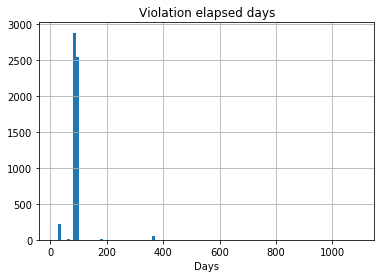

In [264]:
elapsed = (hra['VIOL_END_DATE'] - hra['VIOL_BEGIN_DATE'])

_ = elapsed.dt.days.hist(bins=100)
_ = plt.title('Violation elapsed days')
_ = plt.xlabel('Days')

In [265]:
hrr.head(20)

,WATER_SYSTEM_NUMBER,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED,source
0,CA0300037,1300015,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-08-01,2012-08-31,1300471,2012-08-17,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
1,CA0300037,1300015,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-08-01,2012-08-31,1300470,2012-08-17,OTHER INFORMAL ENFORCEMENT ACTION TAKEN,hr2w_web_data_rtc_8_2018
2,CA0300037,1300017,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-11-01,2012-11-30,1300473,2012-12-12,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
3,CA0300037,1300017,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-11-01,2012-11-30,1300472,2012-12-12,INFORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
4,CA0300037,1300018,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-12-01,2012-12-31,1300476,2013-01-10,OTHER INFORMAL ENFORCEMENT ACTION TAKEN,hr2w_web_data_rtc_8_2018
5,CA0300037,1300018,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-12-01,2012-12-31,1400510,2013-01-11,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
6,CA0300037,1300018,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-12-01,2012-12-31,1300474,2013-01-10,INFORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
7,CA0300037,1300018,RES DISINFECT CONCENTRATION (SWTR),SWTR,NaN,NaN,2012-12-01,2012-12-31,1300475,2013-01-10,OTHER INFORMAL ENFORCEMENT ACTION TAKEN,hr2w_web_data_rtc_8_2018
8,CA0310011,610006,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.069 MG/L,0.060 MG/L,2016-04-01,2016-06-30,9810002,2016-07-25,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
9,CA0310011,610006,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.069 MG/L,0.060 MG/L,2016-04-01,2016-06-30,9810003,2018-06-14,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018


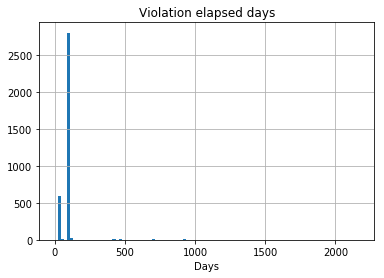

In [266]:
elapsed = (hrr['VIOL_END_DATE'] - hrr['VIOL_BEGIN_DATE'])

_ = elapsed.dt.days.hist(bins=100)
_ = plt.title('Violation elapsed days')
_ = plt.xlabel('Days')

# return to compliance systems
### example

In [267]:
data = hrr.loc[hrr['WATER_SYSTEM_NUMBER'] == "CA0707615"]
data.sort_values(['VIOLATION_NUMBER', 'ENF_ACTION_NUMBER']).drop(columns=['ANALYTE_NAME', 'RESULT', 'MCL'])

,WATER_SYSTEM_NUMBER,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED,source
45,CA0707615,1400021,"MCL, AVERAGE",2014-04-01,2014-06-30,800252,2008-10-21,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
46,CA0707615,1400021,"MCL, AVERAGE",2014-04-01,2014-06-30,900261,2009-01-22,INFORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
44,CA0707615,1400021,"MCL, AVERAGE",2014-04-01,2014-06-30,1000277,2018-08-01,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
48,CA0707615,1500022,"MCL, AVERAGE",2015-01-01,2015-03-30,800252,2008-10-21,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
47,CA0707615,1500022,"MCL, AVERAGE",2015-01-01,2015-03-30,1000277,2018-08-01,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
50,CA0707615,1600023,"MCL, AVERAGE",2015-10-01,2015-12-31,800252,2008-10-21,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
49,CA0707615,1600023,"MCL, AVERAGE",2015-10-01,2015-12-31,1000277,2018-08-01,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
52,CA0707615,1600024,"MCL, AVERAGE",2016-01-01,2016-03-31,800252,2008-10-21,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
51,CA0707615,1600024,"MCL, AVERAGE",2016-01-01,2016-03-31,1000277,2018-08-01,RETURN TO COMPLIANCE,hr2w_web_data_rtc_8_2018
54,CA0707615,1600025,"MCL, AVERAGE",2016-03-01,2016-06-30,800252,2008-10-21,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018


# out of compliance systems
### example

In [268]:
data = hra.loc[hra['WATER_SYSTEM_NUMBER'] == "CA0210001"]
data.sort_values('ENF_ACTION_NUMBER')

,WATER_SYSTEM_NUMBER,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED,source
0,CA0210001,1210014,"MCL, AVERAGE",TOTAL HALOACETIC ACIDS (HAA5),.06580000 MG/L,0.060 MG/L,2012-07-01,2012-09-30,1310029,2012-10-02,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
1,CA0210001,9710011,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.062 MG/L,0.060 MG/L,2016-07-01,2016-09-30,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
2,CA0210001,9710012,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.070 MG/L,0.060 MG/L,2016-10-01,2016-12-31,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
3,CA0210001,9710013,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.095 MG/L,0.060 MG/L,2017-01-01,2017-03-31,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
4,CA0210001,9710014,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.096 MG/L,0.060 MG/L,2017-04-01,2017-06-30,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
5,CA0210001,9710015,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.086 MG/L,0.060 MG/L,2017-07-01,2017-09-30,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018
6,CA0210001,9710016,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.0758 MG/L,0.060 MG/L,2017-10-01,2017-12-31,9910010,2016-09-07,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_active_8_2018


# do all RTC water systems have a RTC EA for each violation number?
no 14 violations are missing a RTC EA

In [269]:
violation_numbers = hrr['VIOLATION_NUMBER'].unique()
missing_rtc = []
for violation_number in violation_numbers:
    data = hrr.loc[hrr['VIOLATION_NUMBER'] == violation_number]
    if "RETURN TO COMPLIANCE" not in data['ENF_ACTION_TYPE_ISSUED'].values:
        missing_rtc.append(data)
display(pd.concat(missing_rtc))

,WATER_SYSTEM_NUMBER,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED,source
901,CA1510019,9912012,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000018 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9912023,2018-04-25,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1350,CA2410004,9611012,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000028 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1351,CA2410004,9611013,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000006 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1352,CA2410004,9611014,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000050 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1353,CA2410004,9611015,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000014 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1354,CA2410004,9611016,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000081 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1355,CA2410004,9611017,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000039 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
1356,CA2410004,9611018,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.000016 MG/L,0.000005 MG/L,2018-01-01,2018-03-31,9611012,2018-05-02,CA STATE ACTION ISSUED,hr2w_web_data_rtc_8_2018
2198,CA3701995,1403969,"MCL, AVERAGE",NITRATE-NITRITE,11.8 MG/L,10 MG/L,2014-01-01,2014-01-31,1405031,2014-01-17,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018
2326,CA3910005,9310009,STATE PRIMARY MCL VIOL - NOT CR6,"1,2,3-TRICHLOROPROPANE",0.011 UG/L,0.005 UG/L,2018-01-01,2018-03-31,9910010,2018-03-22,FORMAL ENFORCEMENT ACTION ISSUED,hr2w_web_data_rtc_8_2018


# amount of time spent out of compliance
Concatenate the active and RTC tables.

In [270]:
hr = pd.concat([hrr, hra])

In [271]:
class MonthCounter(object):
    def __init__(self, start_datetime, end_datetime):
        """Convert datetimes and datetime ranges into a boolean vector of size 
        (number of months)
        
        Parameters
        ----------
        start_datetime : datetime.datetime
        end_datetime : datetime.datetime
        
        Attributes
        ----------
        indices : np.ndarray bool
        """
        start_index = 12 * (start_datetime.year) + start_datetime.month
        end_index = 12 * (end_datetime.year) + end_datetime.month

        index_offset = start_index
        end_index -= index_offset
        start_index = 0
        indices = np.zeros(end_index, dtype='bool')

        self.start_datetime = start_datetime
        self.end_datetime = end_datetime
        self.index_offset = index_offset
        self.indices = indices

    def get_datetime_index(self, datetime):
        ind = (12 * datetime.year) + datetime.month
        return ind - self.index_offset
    
    def add_datetime(self, datetime):
        ind = self.get_datetime_index(datetime)
        self.indices[ind] = True
    
    def add_datetime_range(self, start_datetime, end_datetime):
        start_ind = self.get_datetime_index(start_datetime)
        end_ind = self.get_datetime_index(end_datetime)
        self.indices[start_ind:end_ind] = True
    
    def add_violations(self, data):
        for i, row in data.iterrows():
            self.add_datetime_range(row.VIOL_BEGIN_DATE, row.VIOL_END_DATE)

### subset to those rows with valid start and end times

In [284]:
valid_indices = np.logical_or(hr['VIOL_BEGIN_DATE'].isna(), ~hr['VIOL_END_DATE'].isna())
data = hr.loc[valid_indices].copy()

In [273]:
start_date, end_date = data.VIOL_BEGIN_DATE.min(), data.VIOL_BEGIN_DATE.max()

In [275]:
months_out_of_compliance = []
for water_system_id in data['WATER_SYSTEM_NUMBER'].unique():
    dat = data.loc[data['WATER_SYSTEM_NUMBER'] == water_system_id]
    counter = MonthCounter(start_date, end_date)
    counter.add_violations(dat)
    months_out_of_compliance.append({'WATER_SYSTEM_NUMBER': water_system_id,
                                     'months_ooc': counter.indices.sum()})
    

In [279]:
ooc = pd.DataFrame(months_out_of_compliance)
ooc.set_index('WATER_SYSTEM_NUMBER', inplace=True)

### Join water system locations with the months out-of-compliance data

In [280]:
ec = ec.join(ooc, on='WATER_SYST')

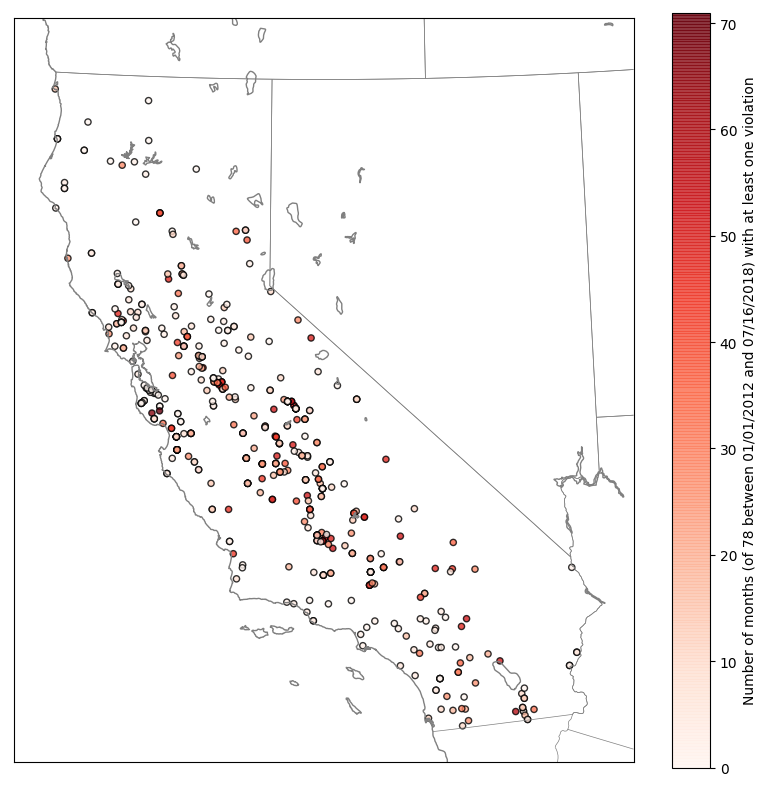

In [283]:
fig = plt.figure(figsize=(10, 10), dpi=100)
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
# m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

_ = m.scatter(ec.geometry.x.values, ec.geometry.y.values, latlon=True,
              s=20, c=ec.months_ooc.values, edgecolor='k',
              cmap='Reds', alpha=0.8)

_ = plt.colorbar(label='Number of months (of 78 between 01/01/2012 and 07/16/2018) with at least one violation')

# Abbreviations

UNIT MEASURES
 - NTU – nephelometric turbidity units
 - ppm – parts per million (mg/L)
 - ppb – parts per billion (ug/L)
 - mg/L – milligrams per liter
 - ug/L – micrograms per liter

ACRONYMS
 - CCR – California Code of Regulations
 - CEHTP - California Environmental Health Tracking Program
 - CWS – Community Water System
 - DDW – Division of Drinking Water
 - DDW – Division of Drinking Water
 - DFA – Division of Financial Assistance
 - DWSRF – Drinking Water State Revolving Fund
 - EA – Enforcement Action
 - ESWTR – Enhanced Surface Water Treatment Rule
 - FOB – Field Operations Branch (Northern and Southern; made up of 5 Regions w/
 - 22 Districts)
 - GWR – Ground Water Rule
 - ID - Identification
 - LPA – Local Primacy Agency – Dept. Delegated Local Health Officer (e.g. County)
 - MCL – Maximum Contaminant Level
 - NCWS – Non-community Water System
 - NTNCWS – Non-transient Non-community Water System
 - PWS – Public Water System
 - RAA – Running Annual Average
 - SDWIS – Safe Drinking Water Information System (National database of Water
 - system information)
 - SWRCB – State Water Resources Control Board (a.k.a. State Water Board)
 - SWTR – Surface Water Treatment Rule
 - TT – Treatment Techniques
 - USEPA – United States Environmental Protection Agency